# Breadth First Search

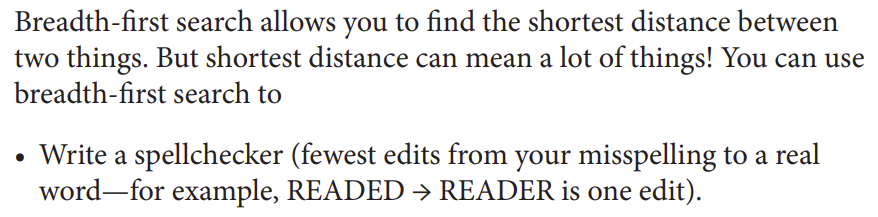
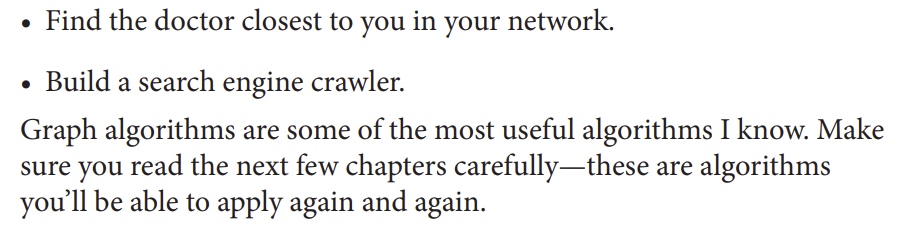

## Introducing Graphs

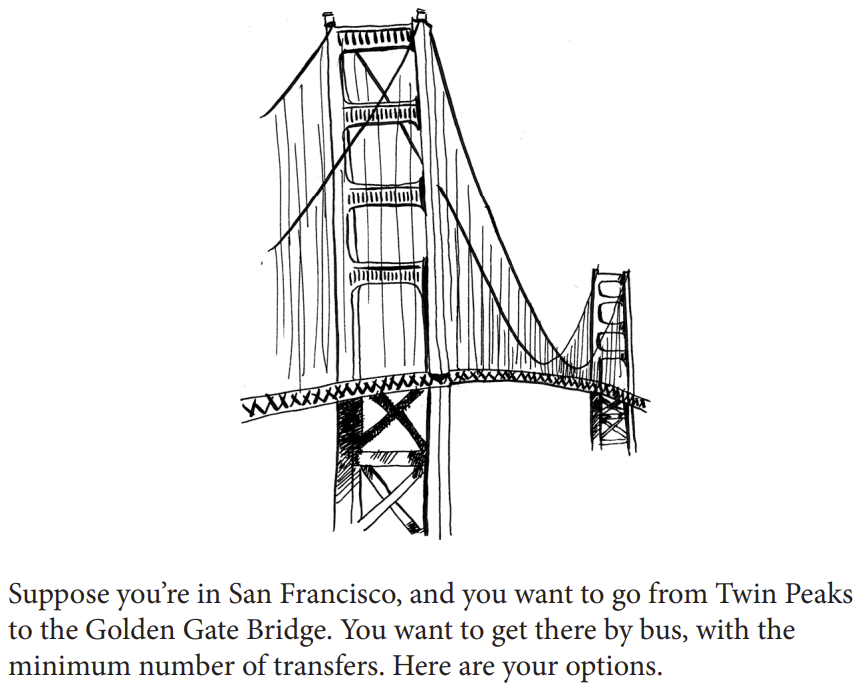

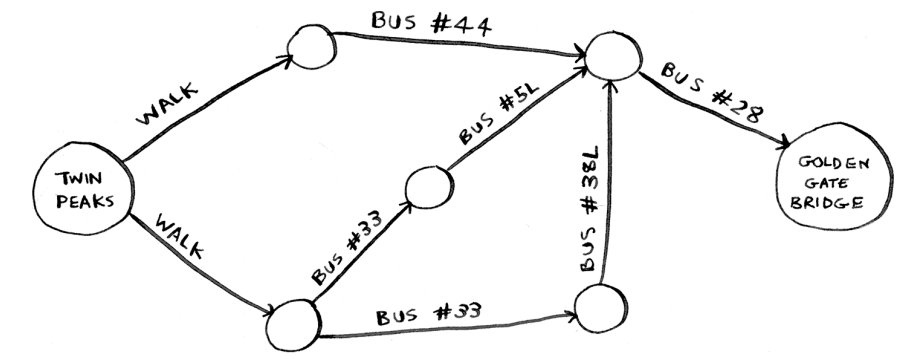

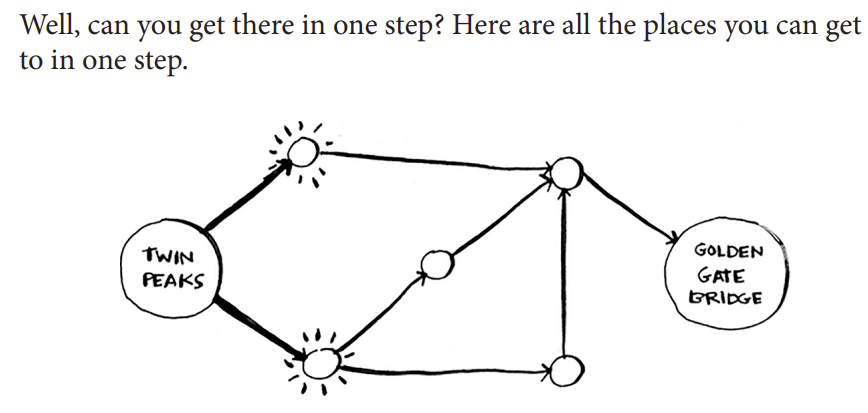

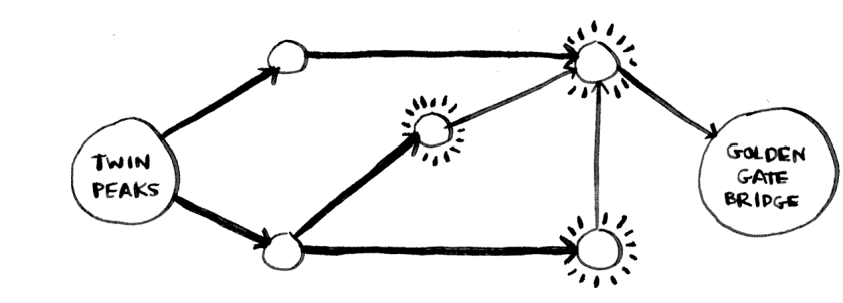

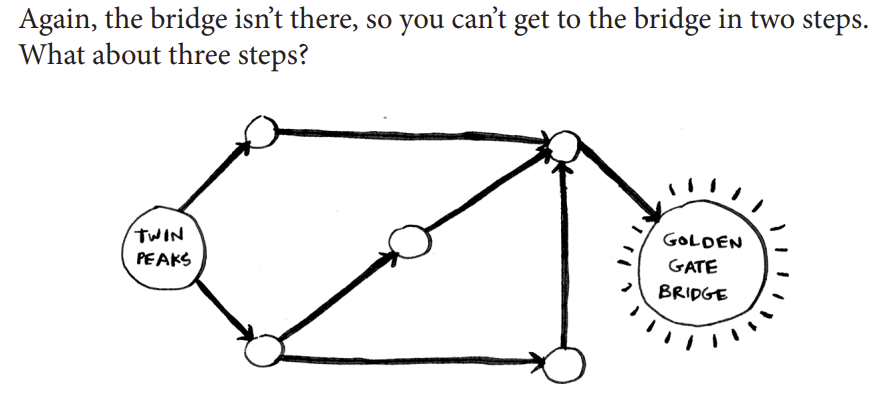

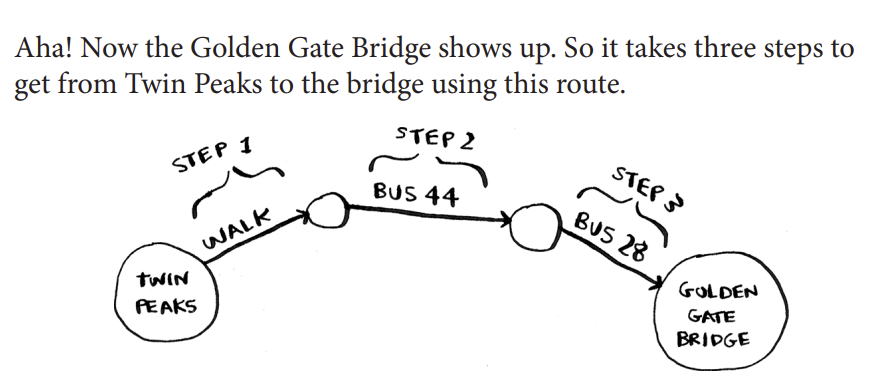

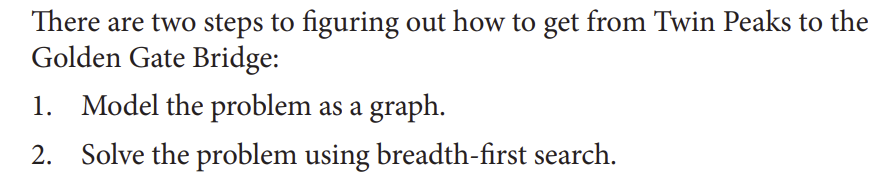

## What's a graph?

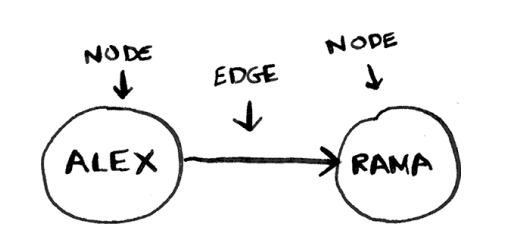

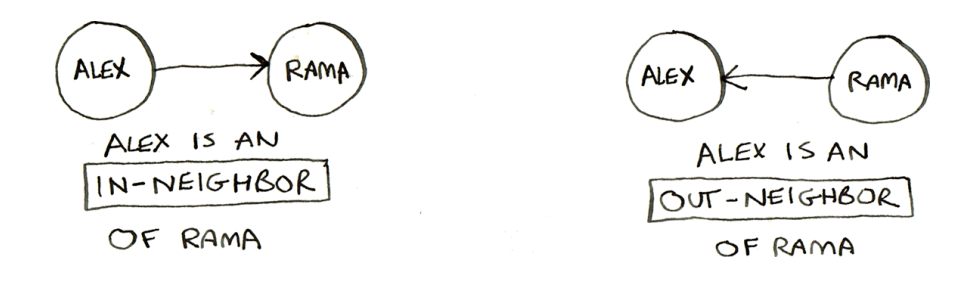

# Breadth First Search

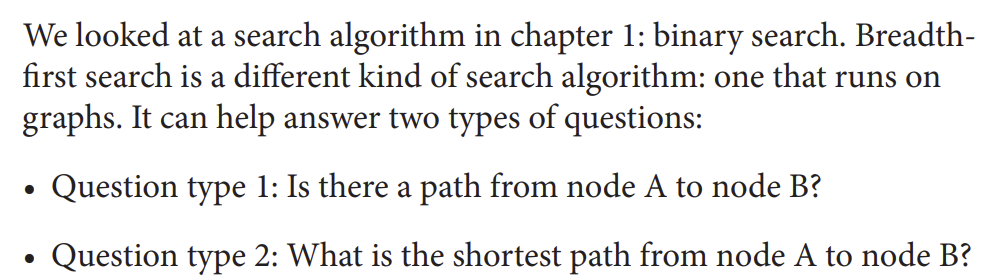

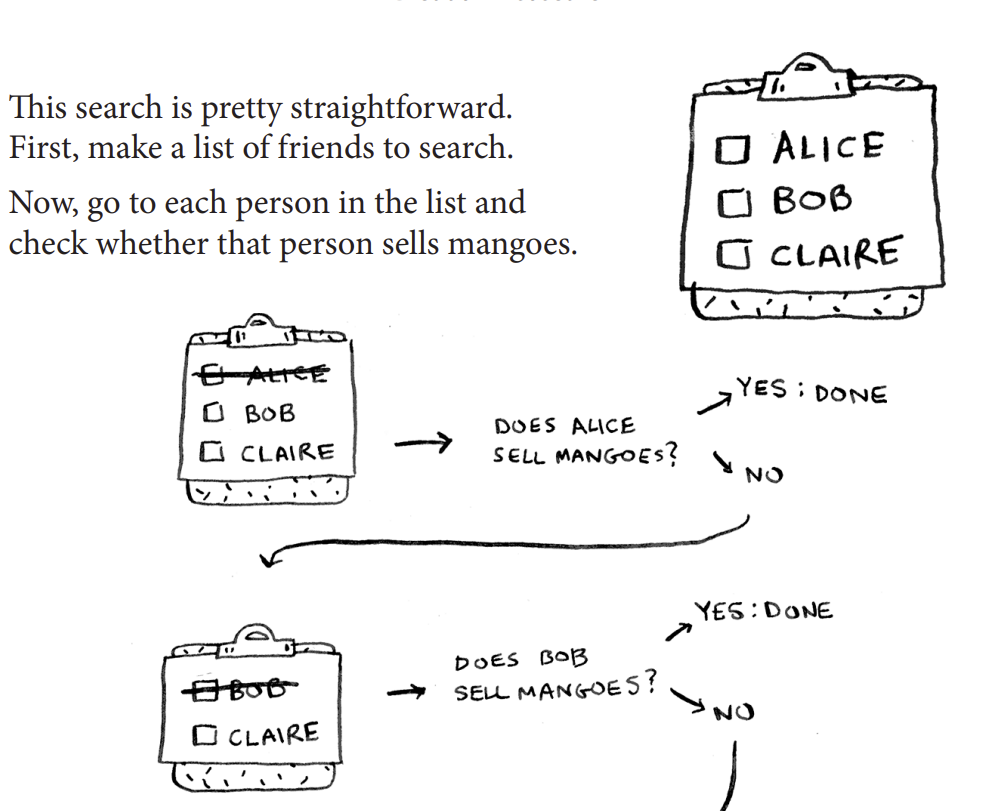

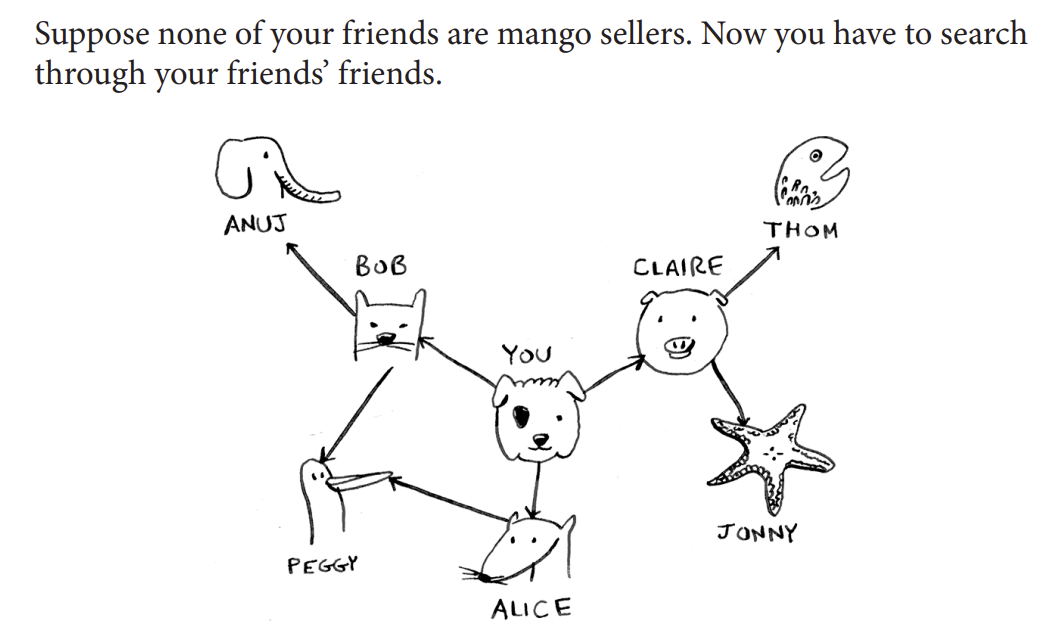

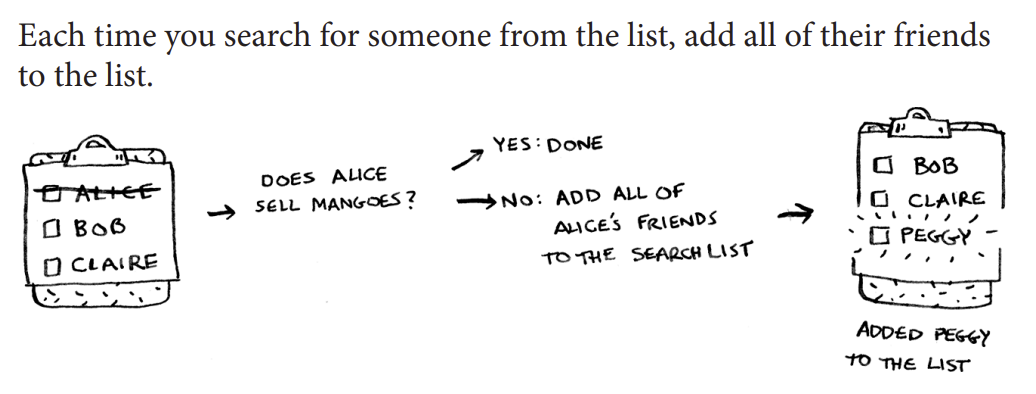

## Queues

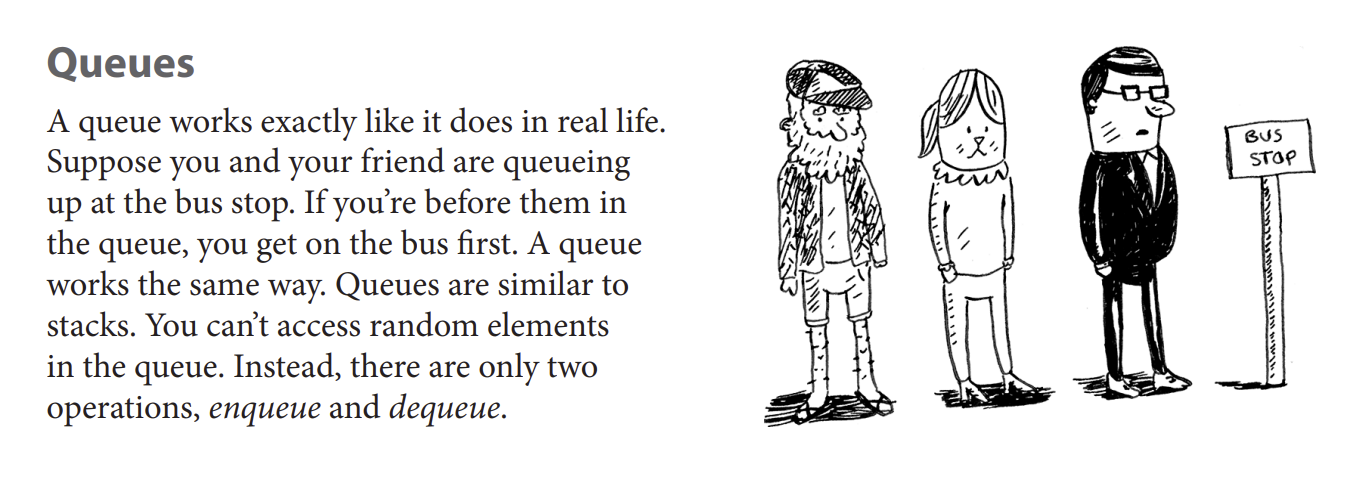

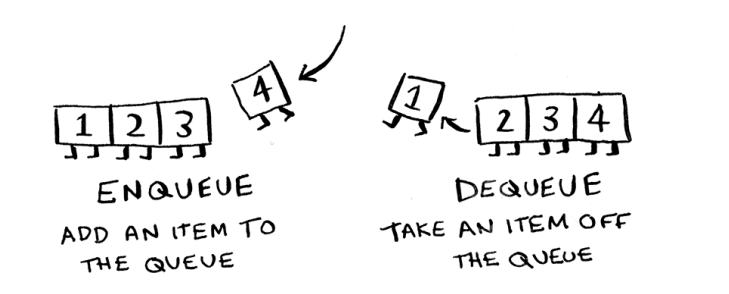

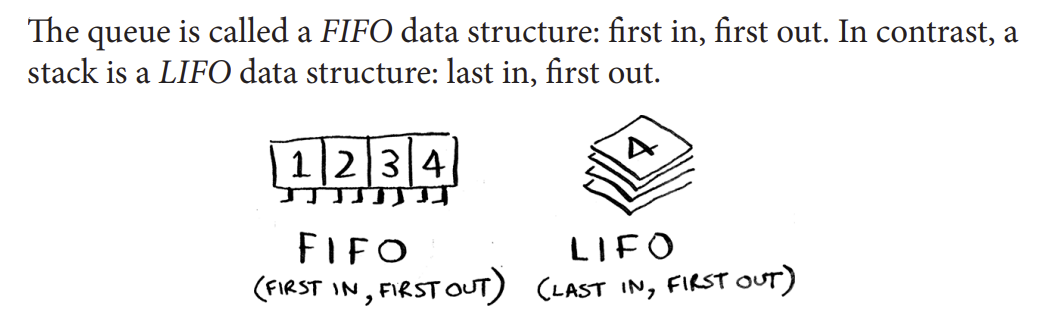

## Implementing the Graph

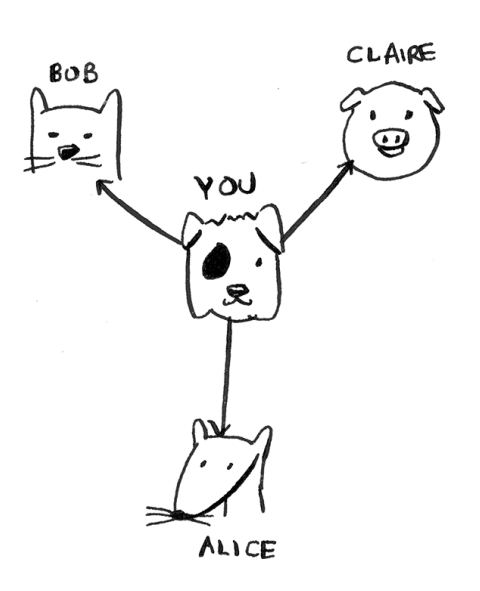

In [7]:
graph = {}
graph['you'] = ['alice', 'bob', 'claire']
graph

{'you': ['alice', 'bob', 'claire']}

In [10]:
graph['you'][0]

'alice'

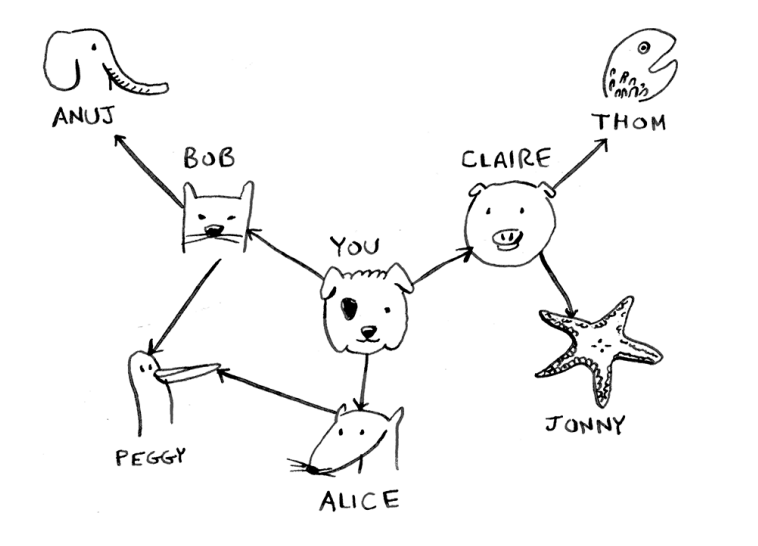

In [14]:
graph = {}
graph['you'] = ['alice', 'bob', 'claire']
graph['bob'] = ['anuj', 'peggy']
graph['alice'] = ['peggy']
graph['claire'] = ['thom', 'jonny']
graph['anuj'] = []
graph['peggy'] = []
graph['thom'] = []
graph['jonny'] = []

graph

{'you': ['alice', 'bob', 'claire'],
 'bob': ['anuj', 'peggy'],
 'alice': ['peggy'],
 'claire': ['thom', 'jonny'],
 'anuj': [],
 'peggy': [],
 'thom': [],
 'jonny': []}

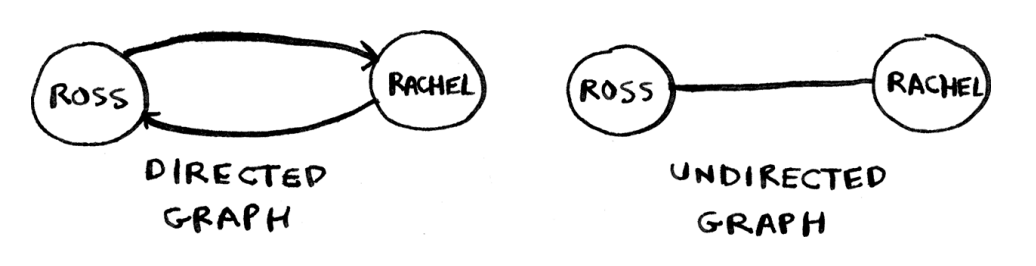
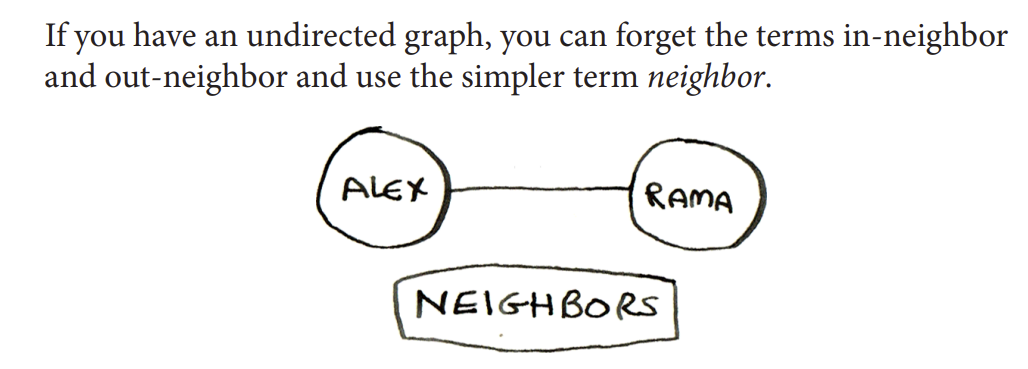

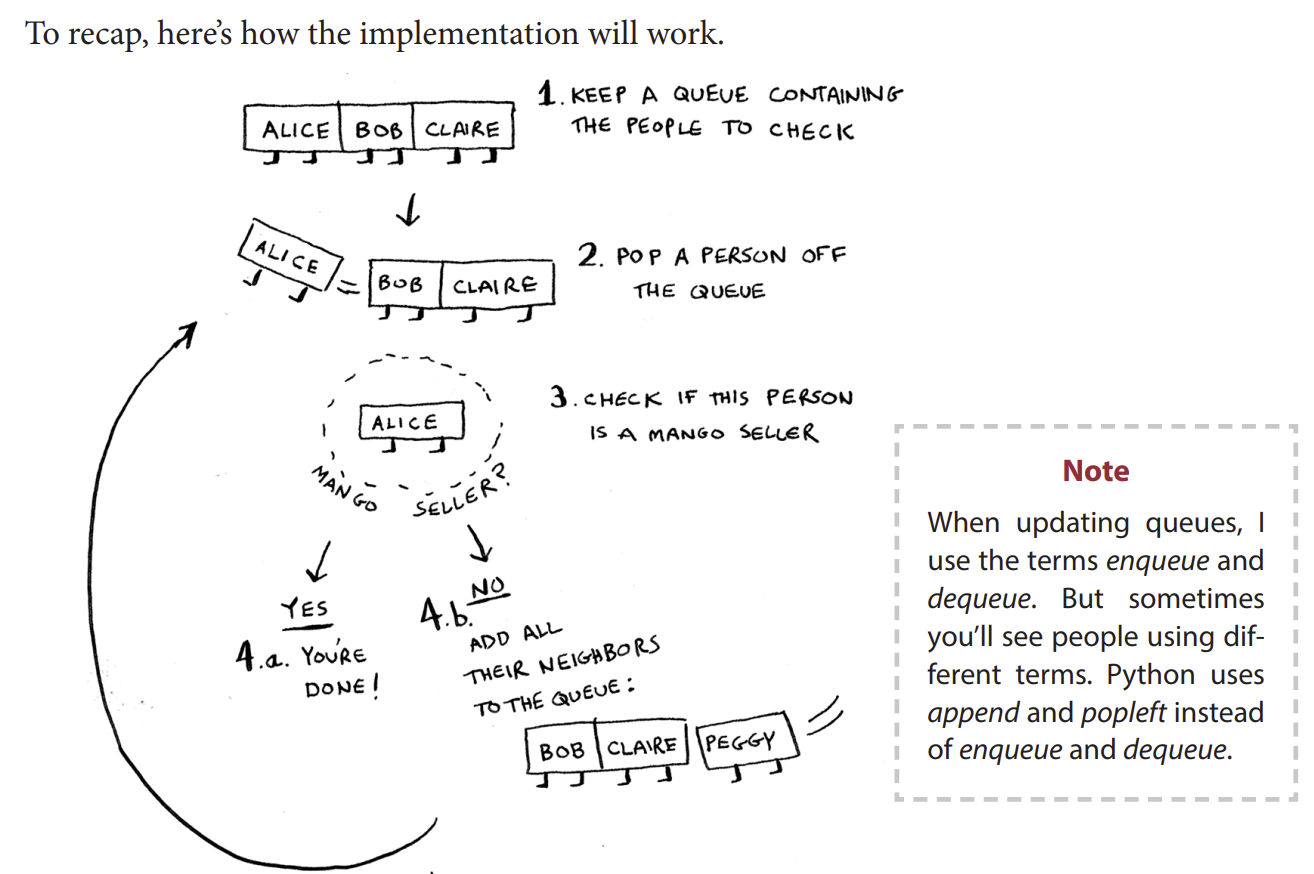
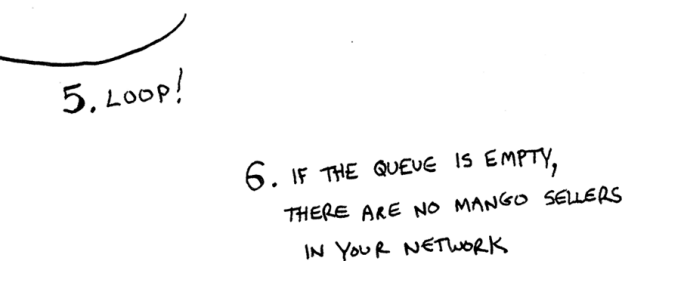

In [23]:
# Building the graph
graph = {}
graph['you'] = ['alice', 'bob', 'claire']
graph['bob'] = ['anuj', 'peggy']
graph['alice'] = ['peggy']
graph['claire'] = ['thom', 'jonny']
graph['anuj'] = []
graph['peggy'] = []
graph['thom'] = []
graph['jonny'] = []

In [24]:
# building the queue
from collections import deque
search_queue = deque()
search_queue += graph['you']
search_queue

deque(['alice', 'bob', 'claire'])

In [25]:
def person_is_seller(name): # simple function saying that if the last letter of person's name is m, is mango seller
    return name[-1] == 'm'

while search_queue: # while the search queue still has people in it
    person = search_queue.popleft() # grab the first person in the queue, leftmost of the list
    print(f'CHECKING: {person}')
    if person_is_seller(person): # check if the person sells mangos
        print(f'{person} is a mango seller.') # if so, print it
    else: # otherwise, add all that person's friends to the queue
        search_queue += graph[person]
print('Nobody left.')


CHECKING: alice
CHECKING: bob
CHECKING: claire
CHECKING: peggy
CHECKING: anuj
CHECKING: peggy
CHECKING: thom
thom is a mango seller.
CHECKING: jonny
Nobody left.


Problem: Shared Friends, meaning I was checking `peggy` twice.

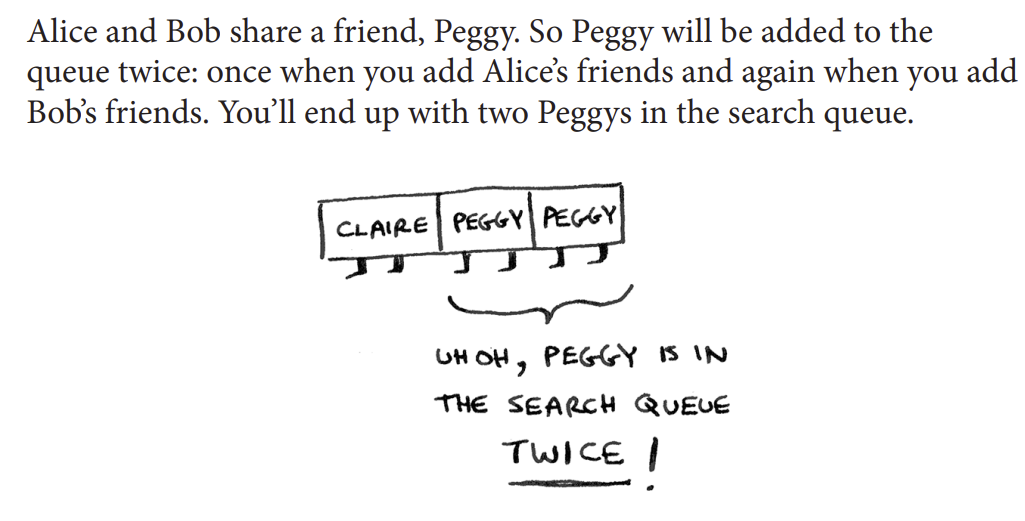

### Final Code
Takes the duplicates into account.

In [26]:
# imports
from collections import deque

# graph
graph = {}
graph['you'] = ['alice', 'bob', 'claire']
graph['bob'] = ['anuj', 'peggy']
graph['alice'] = ['peggy']
graph['claire'] = ['thom', 'jonny']
graph['anuj'] = []
graph['peggy'] = []
graph['thom'] = []
graph['jonny'] = []

# algorithm
def search(name):

    # function for seeing if person sells mangos
    def person_is_seller(name):
        return name[-1] == 'm' # is the last letter of person's name 'm'?

    search_queue = deque() # creating a queue object
    search_queue += graph[name] # stating that we're looking for sellers among graph['you'] connections
    searched = set() # set removes duplicates, so we can use it to know if somebody has been searched before
    
    while search_queue: # loop as long as queue has people in it
        person = search_queue.popleft() # choose first person in line up
        print(f'CHECKING: {person}')

        if person in searched:
            print(f'DUPLICATE')

        elif person not in searched: # if that person hasn't been searched before
            print(f'NOT DUPLICATE')
            if person_is_seller(person): # check if they sell mangos
                print(f'{person} sells mangos.')
                return True
            else:
                print(f'{person} does not sell mangos.')
                search_queue += graph[person] # does not sell mangos, add all friends to queue
                searched.add(person) # mark that we searched this person
    
    print('No mango sellers found.')
    return False

search('you')


CHECKING: alice
NOT DUPLICATE
alice does not sell mangos.
CHECKING: bob
NOT DUPLICATE
bob does not sell mangos.
CHECKING: claire
NOT DUPLICATE
claire does not sell mangos.
CHECKING: peggy
NOT DUPLICATE
peggy does not sell mangos.
CHECKING: anuj
NOT DUPLICATE
anuj does not sell mangos.
CHECKING: peggy
DUPLICATE
CHECKING: thom
NOT DUPLICATE
thom sells mangos.


True

Algorithm Time:

$$ O(Vertices + Edges) $$

# Recap

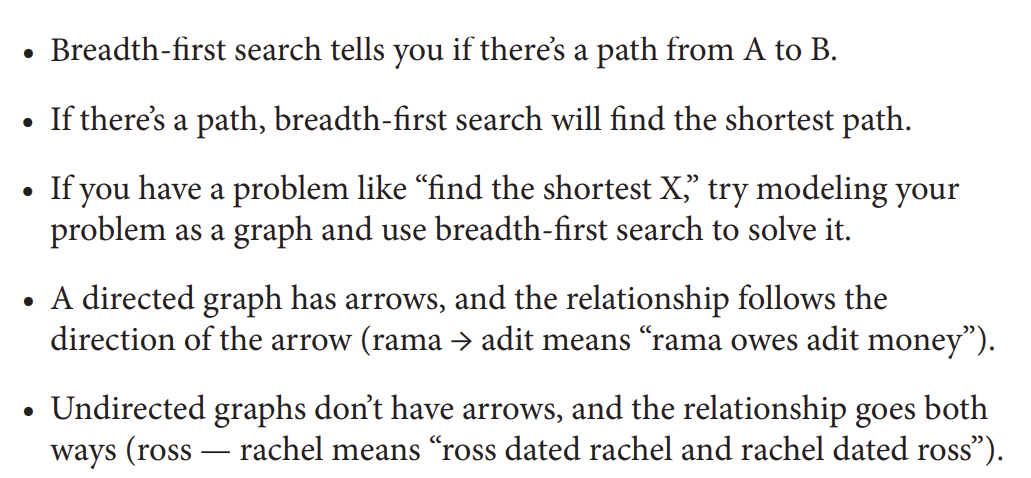

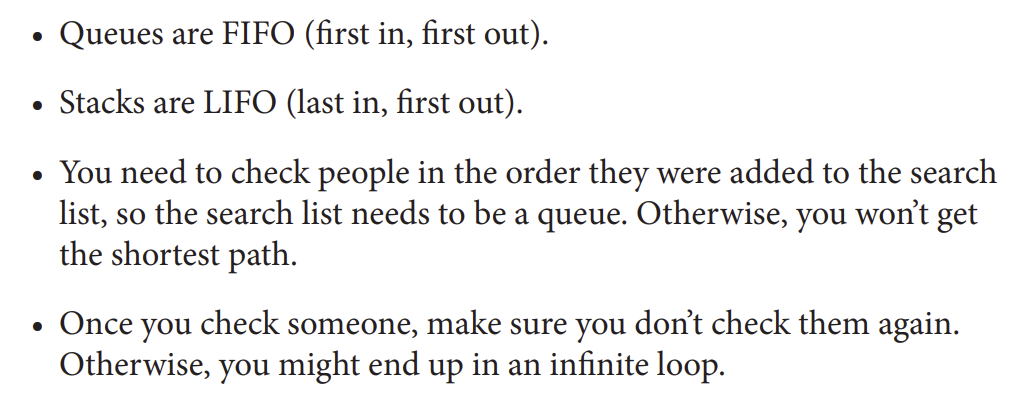